**Leemos las imágenes del corpus olivetti**

In [1]:
from sklearn.datasets import fetch_olivetti_faces
orl = fetch_olivetti_faces()
X = orl.data
y = orl.target

**Principal Component Analysis (PCA)**

In [2]:
import numpy as np
m = np.mean(X, axis=0)
X = X - m
S = np.cov(X.T, bias=True)
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]

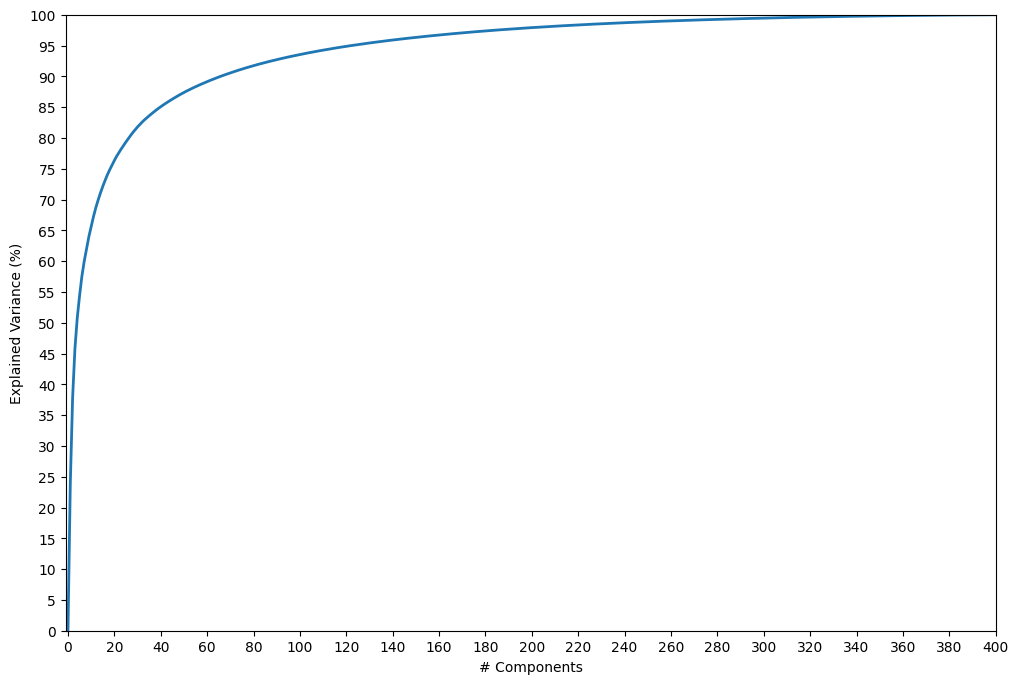

In [3]:
import matplotlib.pyplot as plt
explained_var= 0
explained_var_per= np.empty(len(La)+1)
explained_var_per[0]=0
total_var=np.sum(La)
for i in range(1,len(La)+1):
  explained_var += La[i-1]
  explained_var_per[i]=100.0 * explained_var/total_var
plt.figure(1, figsize=(12,8))
plt.axis([-1, 400, 0, 100])
plt.plot(explained_var_per, linewidth=2)
plt.xlabel('# Components')
plt.ylabel('Explained Variance (%)')
plt.xticks(np.linspace(0,400,21))
plt.yticks(np.linspace(0,100,21))
plt.show()

Visualizamos las eigen-images

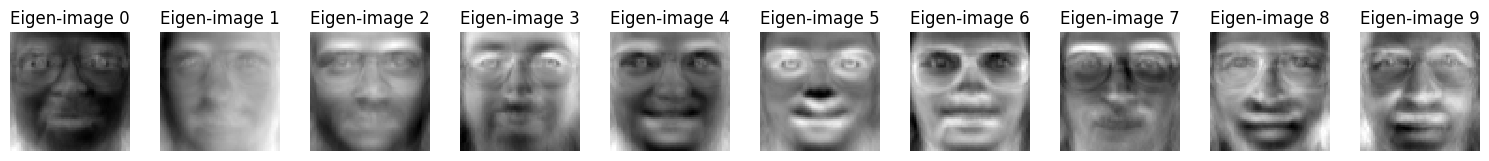

In [4]:
nrows, ncols = 1, 10
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15*nrows/ncols), constrained_layout=True)
for c in np.arange(0, 10):
    ax = axes.flat[c]
    ax.set_axis_off()
    ax.imshow(U[:,c].reshape(64,64), cmap=plt.cm.gray, interpolation="none")
    ax.set_title("Eigen-image {:}".format(c))

reducción de imagénes a 2d para examinar cómo se separa cada clase del resto.

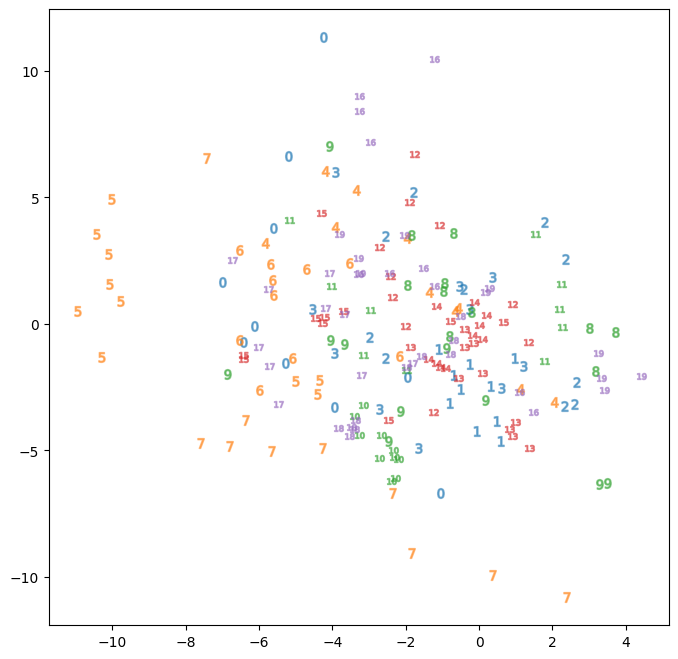

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
Xr = X @ U[:,0:2]
plt.figure(figsize=(8, 8))
colors = cm.tab10(np.linspace(0, 1, 40))
for img in np.arange(0, 20):
  Xr_face = Xr[np.where(y==img)]
  plt.scatter(Xr_face[:,0], Xr_face[:,1], s=50, alpha=0.5, marker=f"${img}$", color=colors[img])


Comparamos pares de clases

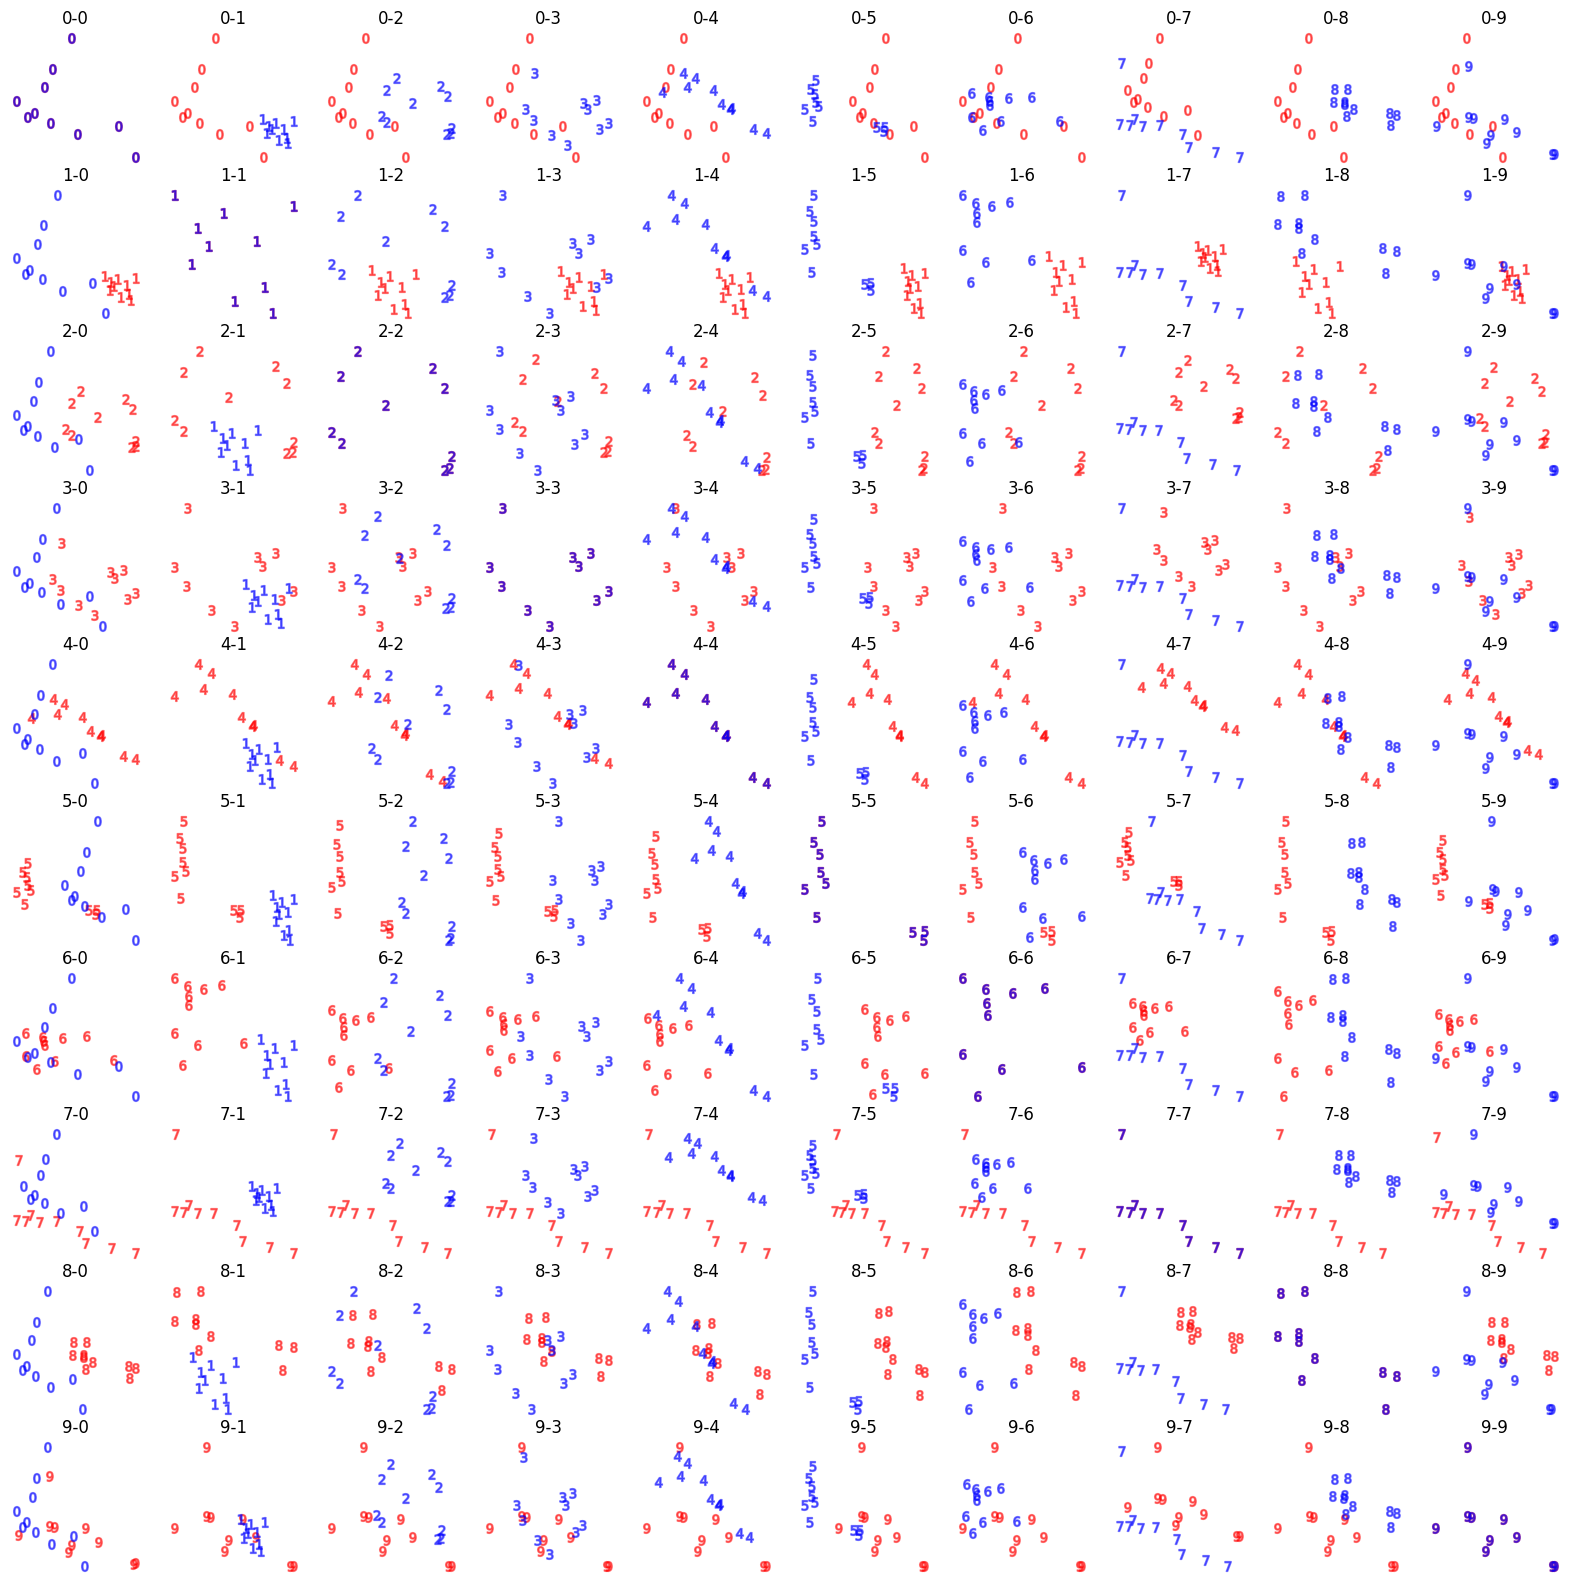

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
Xr = X @ U[:,0:2]
fig, axes = plt.subplots(10, 10, figsize=(20, 20))
for i in np.arange(0,10):
    for j in np.arange(0,10):
        ax = axes[i,j]
        ax.set_axis_off()
        ax.set_title('{:d}-{:d}'.format(i,j))
        Xr_face_i = Xr[np.where(y==i)]
        Xr_face_j = Xr[np.where(y==j)]
        ax.scatter(Xr_face_i[:,0], Xr_face_i[:,1], s=50, alpha=0.5, marker=f"${i}$", color="red")
        ax.scatter(Xr_face_j[:,0], Xr_face_j[:,1], s=50, alpha=0.5, marker=f"${j}$", color="blue")